---
title: How to perform (simple) customer segmentation with clustering
author: Dr Ghita Berrada
bibliography: ../../../../references/DS101.bib
---

The goal of clustering is to find groups (of similar points) in the data. One use case of clustering is customer segmentation i.e grouping customers together according to similar properties (e.g similar spending patterns) in order to maximize their value to the business.
Here, we'll demonstrate a very simple case of that.

We load a very simple dataset representing a variety of mall customer attributes after importing the prerequisite set of libraries for our demo. 

In [32]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt # library for plots
import seaborn as sns # library for plots

import missingno as msno # library for the exploration of missingness patterns in data

from sklearn.cluster import KMeans # import for k-means algorithm

In [9]:
data = pd.read_csv("Mall_Customers.csv")  #loading our dataset


We then check the content of our dataset.

In [10]:
data.head()

CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40

In [11]:
data.describe()

CustomerID         Age  Annual_Income_(k$)  Spending_Score
count  200.000000  200.000000          200.000000      200.000000
mean   100.500000   38.850000           60.560000       50.200000
std     57.879185   13.969007           26.264721       25.823522
min      1.000000   18.000000           15.000000        1.000000
25%     50.750000   28.750000           41.500000       34.750000
50%    100.500000   36.000000           61.500000       50.000000
75%    150.250000   49.000000           78.000000       73.000000
max    200.000000   70.000000          137.000000       99.000000

Let's now check our data for any missing values.

<Axes: >

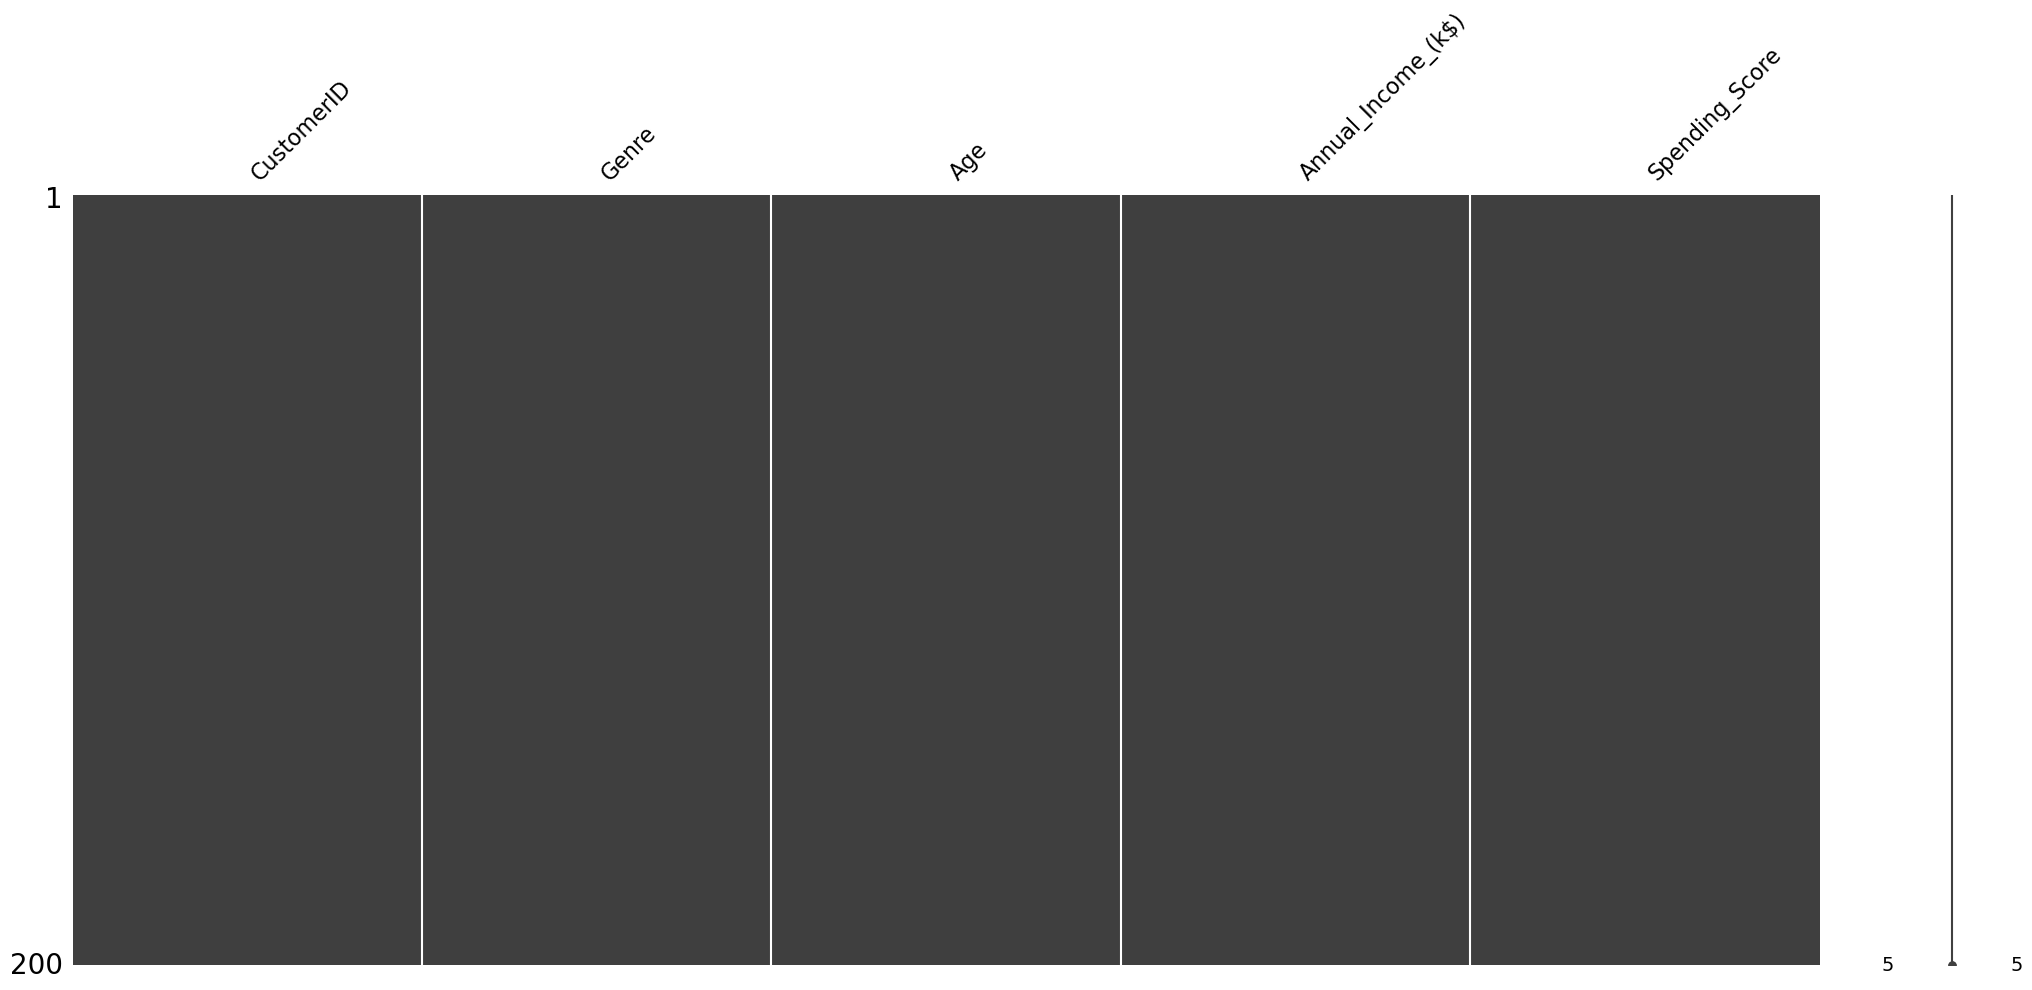

In [12]:
msno.matrix(data)

There are no missing values in our data! Hurray! This should make our life much easier...

This count of NULL values per column confirms that there are indeed no missing values in our data. We're good to go!

In [13]:
data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Our dataset contains more data points from female customers...

In [14]:
data.groupby(by='Genre')['Age'].count()

Genre
Female    112
Male       88
Name: Age, dtype: int64

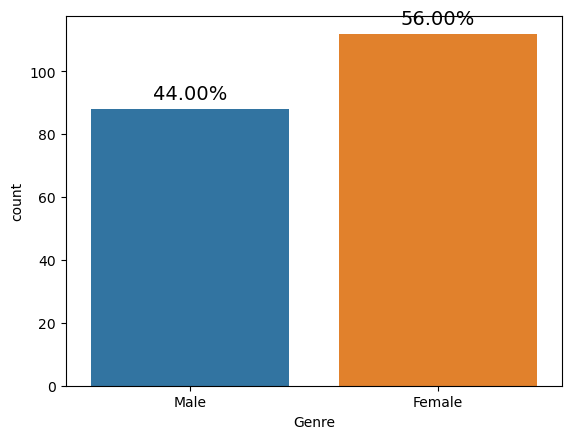

In [18]:
s = sns.countplot(x = 'Genre',data = data)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data)*100),
            ha="center", fontsize=14)

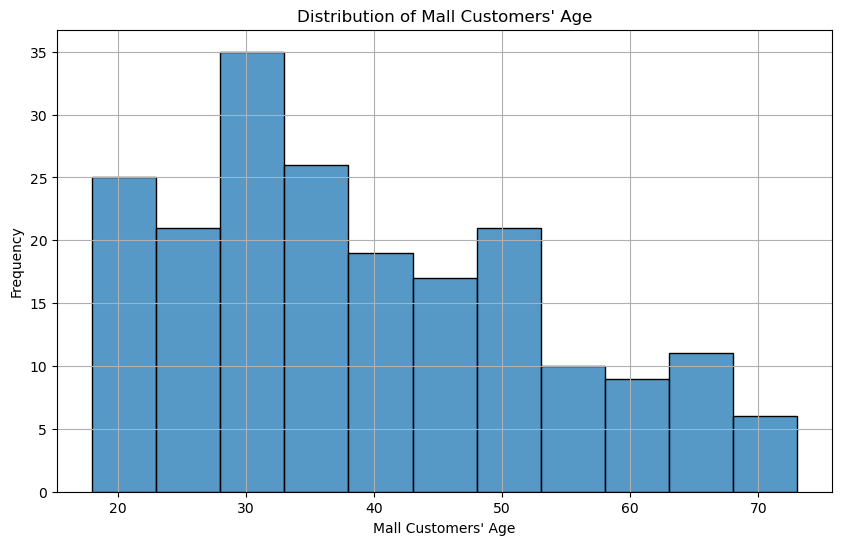

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age',binwidth=5)
plt.title("Distribution of Mall Customers' Age")
plt.xlabel("Mall Customers' Age")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



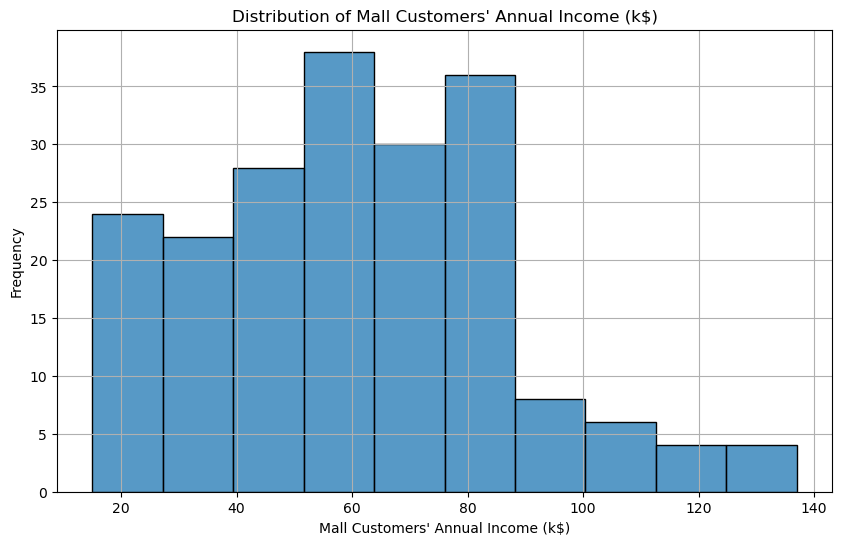

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Annual_Income_(k$)')
plt.title("Distribution of Mall Customers' Annual Income (k$)")
plt.xlabel("Mall Customers' Annual Income (k$)")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

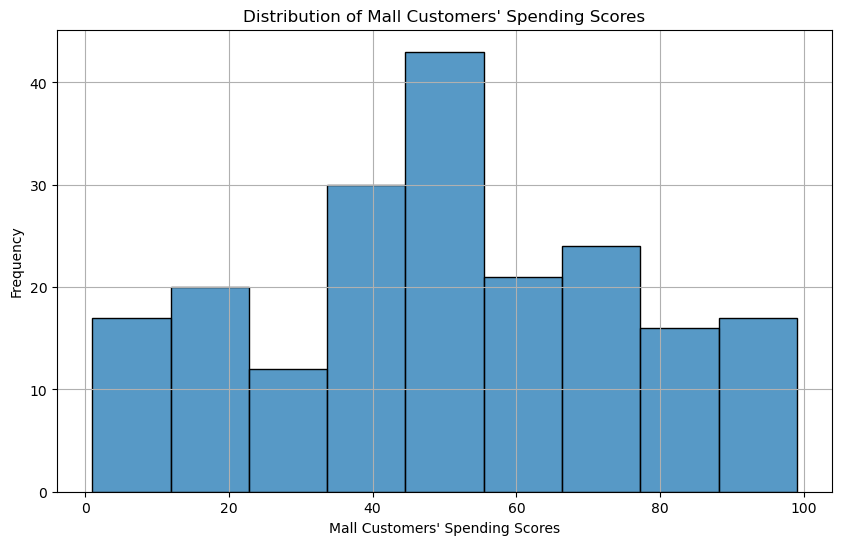

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Spending_Score')
plt.title("Distribution of Mall Customers' Spending Scores")
plt.xlabel("Mall Customers' Spending Scores")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Now, we will cluster (i.e group) our data using the k-means algorithm. K-means requires the number of clusters as a parameter. 

Before we proceed, we drop duplicate data points from our dataset and only keep the income and spending score variables to allow easy visualisation

In [59]:
data.drop_duplicates(inplace=True)
# using only Spending_Score and income variable for easy visualisation
X = data.iloc[:, [3, 4]].values

We determine the number of parameters for k-means with the "elbow method".

- In this method, we vary the number of clusters `k`, apply k-means to the data and measure what we call the within-cluster-sum-of-squares (WCSS) i.e the sum of the squared distance between each point in a cluster and the centroid of the cluster it belongs to. 
- We then plot the WCSS against `k`: the optimal value of clusters (i.e the number of clusters we need to choose for k-means) corresponds to the value of `k` starting from which the decrease rate of the WCSS curve inflects and the graph starts to look like a straight line.

Note that we initialize the K-means runs with the K-means++ initialization (see details in [arthur2007k]).

K-means initialization is important! Two random initializations can result in totally different clustering outcomes

E.g:

Random initialization 1:

![](figures/kmeans_init.png)



Random initialization 2:

![](figures/kmeans_init2.png)

In [60]:
# Using the elbow method to find the optimal number of clusters
# https://iq.opengenus.org/k-means-vs-k-means-p/
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init='auto')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

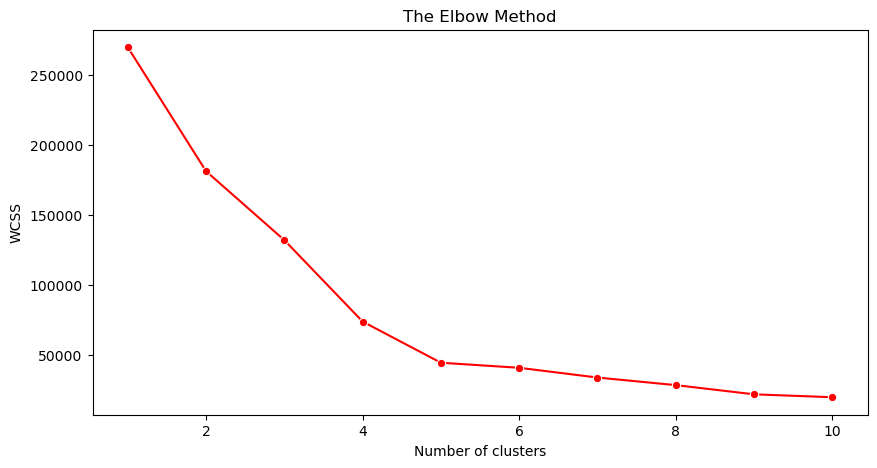

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot above shows that the WCSS curve inflects and flattens for a `k` value of 5: so the optimal number of clusters is 5. This is the parameter we'll pass to the k-means algorithm.

In [62]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42,n_init='auto')
y_kmeans = kmeans.fit_predict(X)

Let's visualise our results!

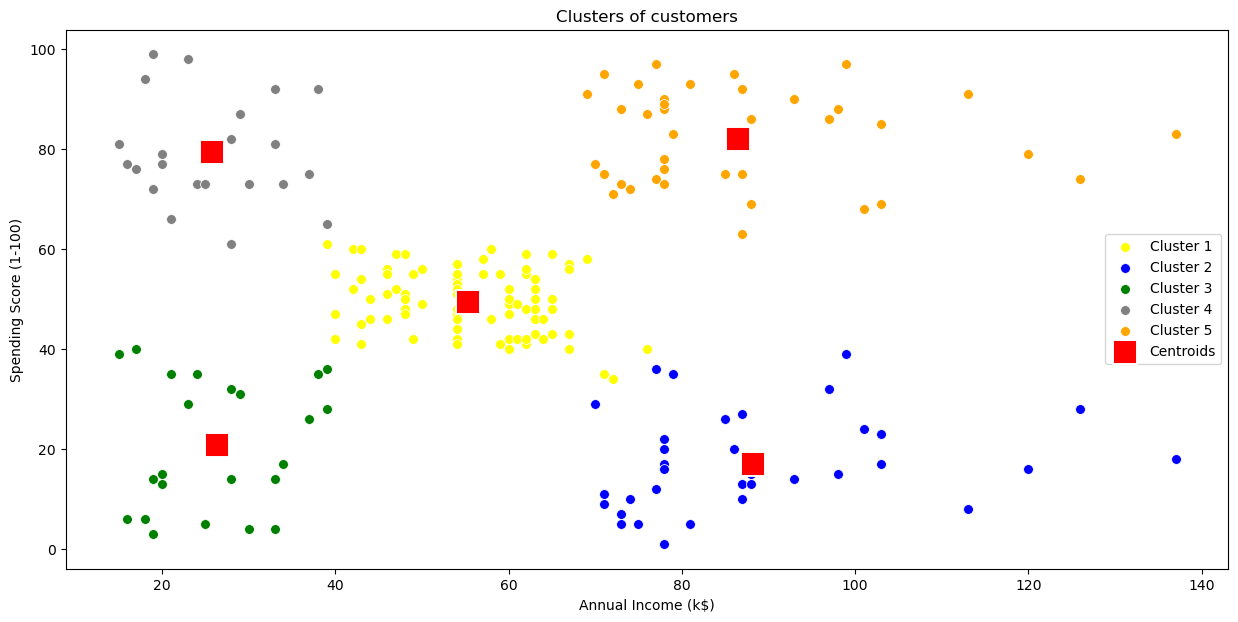

In [63]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [75]:

X = data[['Age','Annual_Income_(k$)']].values #age and income


In [76]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init='auto')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

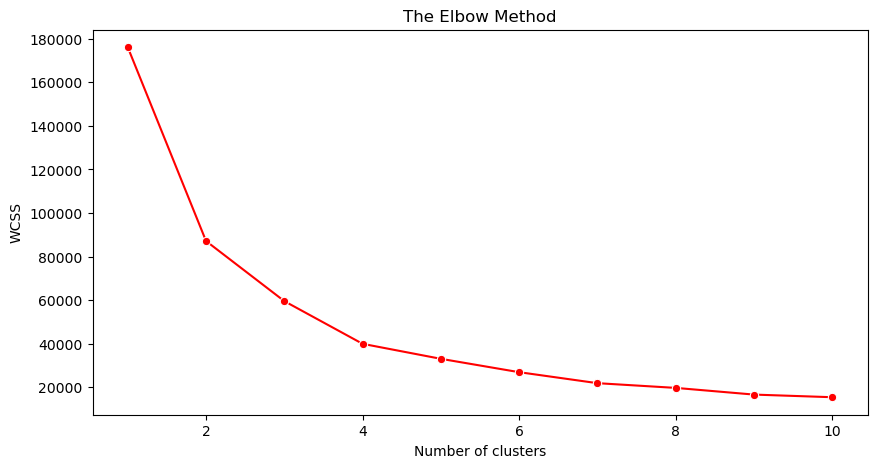

In [78]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42,n_init='auto')
y_kmeans = kmeans.fit_predict(X)

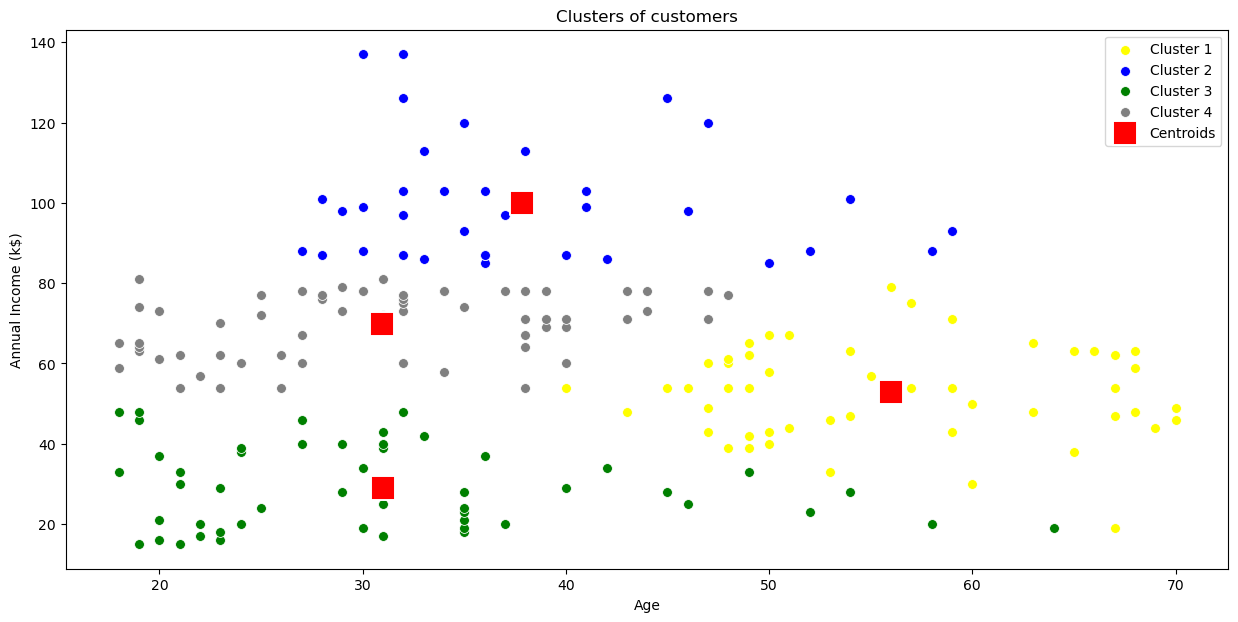

In [81]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()